# Part 1, exploratory data analysis (EDA)

1. [1 балл] Загрузка данных - загрузите датасет, посмотрите на его `head` и `tail`. Давайте перекодируем текстовые переменные sex и  smoker, чтобы с ними было удобнее работать. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. 
2. [1 балл] Какой средний возраст участников опроса? А если по отдельности мужчин и женщин? 
3. [1 балл] Сколько человек в выборке женщин-курильщиц из северо-восточного региона?
4. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Какая переменная сильнее всего скоррелирована со стоимостью страховки? Почему? А как скоррелирован возраст со стоимостью? 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [2 балла] Визуализация + группировка - давайте посмотрим, сколько в среднем придется заплатить за страховку, в зависимости от региона.  Для этого сгруппируйте данные по переменной `region` при помощи `groupby` и примените функцию `mean()` к столбцу `charges`. После этого добавьте конструкцию `.plot.bar()` для отображения на графике средних трат. Где не стоит жить, если хочется сэкономить на страховке? 
7. [3 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать два каких-нибудь осмысленных вопроса и/или визуализаций для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 10 баллов, прек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Комментарий к решению
Супер, с загрузкой данных справились

 Загрузка данных

In [3]:
data = pd.read_csv('/Users/macbook/Desktop/Tazetdinov_Pavel_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# кодируем пол, мужчина - 1, женщина - 0
data.sex = data.sex.map({'female':0, 'male':1})
data.smoker = data.smoker.map({'no':0, 'yes':1})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [8]:
data.T #транспонируем

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19,18,28,33,32,31,46,37,37,60,...,23,52,57,23,52,50,18,18,21,61
sex,0,1,1,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
bmi,27.9,33.77,33,22.705,28.88,25.74,33.44,27.74,29.83,25.84,...,24.225,38.6,25.74,33.4,44.7,30.97,31.92,36.85,25.8,29.07
children,0,1,3,0,0,0,1,3,2,0,...,2,2,2,0,3,3,0,0,0,0
smoker,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
region,southwest,southeast,southeast,northwest,northwest,southeast,southeast,northwest,northeast,northwest,...,northeast,southwest,southeast,southwest,southwest,northwest,northeast,southeast,southwest,northwest
charges,16884.9,1725.55,4449.46,21984.5,3866.86,3756.62,8240.59,7281.51,6406.41,28923.1,...,22395.7,10325.2,12629.2,10795.9,11411.7,10600.5,2205.98,1629.83,2007.94,29141.4


### Комментарий к решению
Всё верно :)

Средний возраст участников опроса (общий/мужчин/женщин)

In [9]:
data.sum()

age                                                     52459
sex                                                       676
bmi                                                   41027.6
children                                                 1465
smoker                                                    274
region      southwestsoutheastsoutheastnorthwestnorthwests...
charges                                           1.77558e+07
dtype: object

In [10]:
data_age = data.groupby('sex').sum()
data_age

,age,bmi,children,smoker,charges
sex,,,,,
0,26151,20110.070,711,115,8.321061e+06
1,26308,20917.555,754,159,9.434764e+06


In [11]:
age0 = data_age.iloc[0,0]
age1 = data_age.iloc[1,0]
age=age0+age1
print(age0,age1)

26151 26308


In [12]:
data_kol = data['sex'].value_counts()
data_kol

1    676
0    662
Name: sex, dtype: int64

In [13]:
kol0 = data_kol.iloc[1]
kol1 = data_kol.iloc[0]
kol=kol1+kol0
print(kol0,kol1)

662 676


In [14]:
print('СРЕДНИЙ ВОЗРАСТ УЧАСТНИКОВ ОПРОСА')
print(age/kol)
print('СРЕДНИЙ ВОЗРАСТ МУЖЧИН')
print(age1/kol1)
print('СРЕДНИЙ ВОЗРАСТ ЖЕНЩИН')
print(age0/kol0)

СРЕДНИЙ ВОЗРАСТ УЧАСТНИКОВ ОПРОСА
39.20702541106129
СРЕДНИЙ ВОЗРАСТ МУЖЧИН
38.917159763313606
СРЕДНИЙ ВОЗРАСТ ЖЕНЩИН
39.503021148036254


### Комментарий к решению
И здесь всё хорошо

 
 
 
 
 
 
 
Сколько человек в выборке женщин-курильщиц из северо-восточного региона? (northeast)

In [15]:
data_f0 = data[data['sex'] == 0] #оставляем только женщин
data_f1 = data_f0[data_f0['smoker'] == 1] #оставляем только курящих женщин

data_f1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
11,62,0,26.29,0,1,southeast,27808.7251
23,34,0,31.92,1,1,northeast,37701.8768
58,53,0,22.88,1,1,southeast,23244.7902
64,20,0,22.42,0,1,northwest,14711.7438


In [16]:
fem_sm = data_f1.groupby('region').sum()
fem_sm

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,1123,0,790.59,36,29,8.129293e+05
northwest,1126,0,820.61,24,29,8.604539e+05
southeast,1413,0,1161.05,34,36,1.189254e+06
southwest,778,0,632.70,22,21,6.654478e+05


In [17]:
print('КОЛИЧЕСТВО КУРЯЩИХ ЖЕНЩИН N-E')
fem_sm.loc['northeast','smoker']

КОЛИЧЕСТВО КУРЯЩИХ ЖЕНЩИН N-E


29

### Комментарий к решению
Отлично, действительно лучше не курить и быть молодым, чтобы подешевле страховку покупать. Единственное - у  вас кореляция по кендаллу посчитана, а в выводах уже про пирсона говорите :3

 При помощи heatmap постройте тепловую карту корреляций для всего датасета. Какая переменная сильнее всего скоррелирована со стоимостью страховки? Почему? А как скоррелирован возраст со стоимостью?

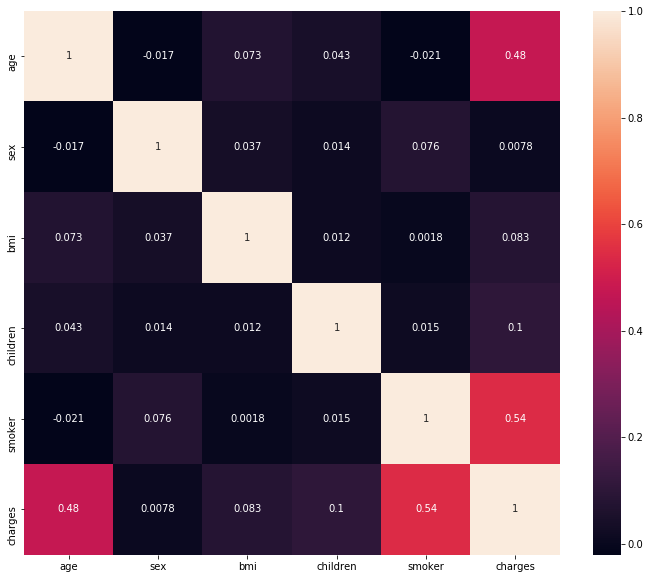

In [18]:
datah = data.drop(['region'], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(datah.corr('kendall'), annot=True);

Стоимость сильнее всего скореллирована с курением =0,54 (средняя корелляция по Пирсону)
Корелляция стоимости с возрастом 0,48 (тоже средняя корелляция)

### Комментарий к решению
Супер





Постройте гистограммы всех числовых переменных датасета при помощи одной команды

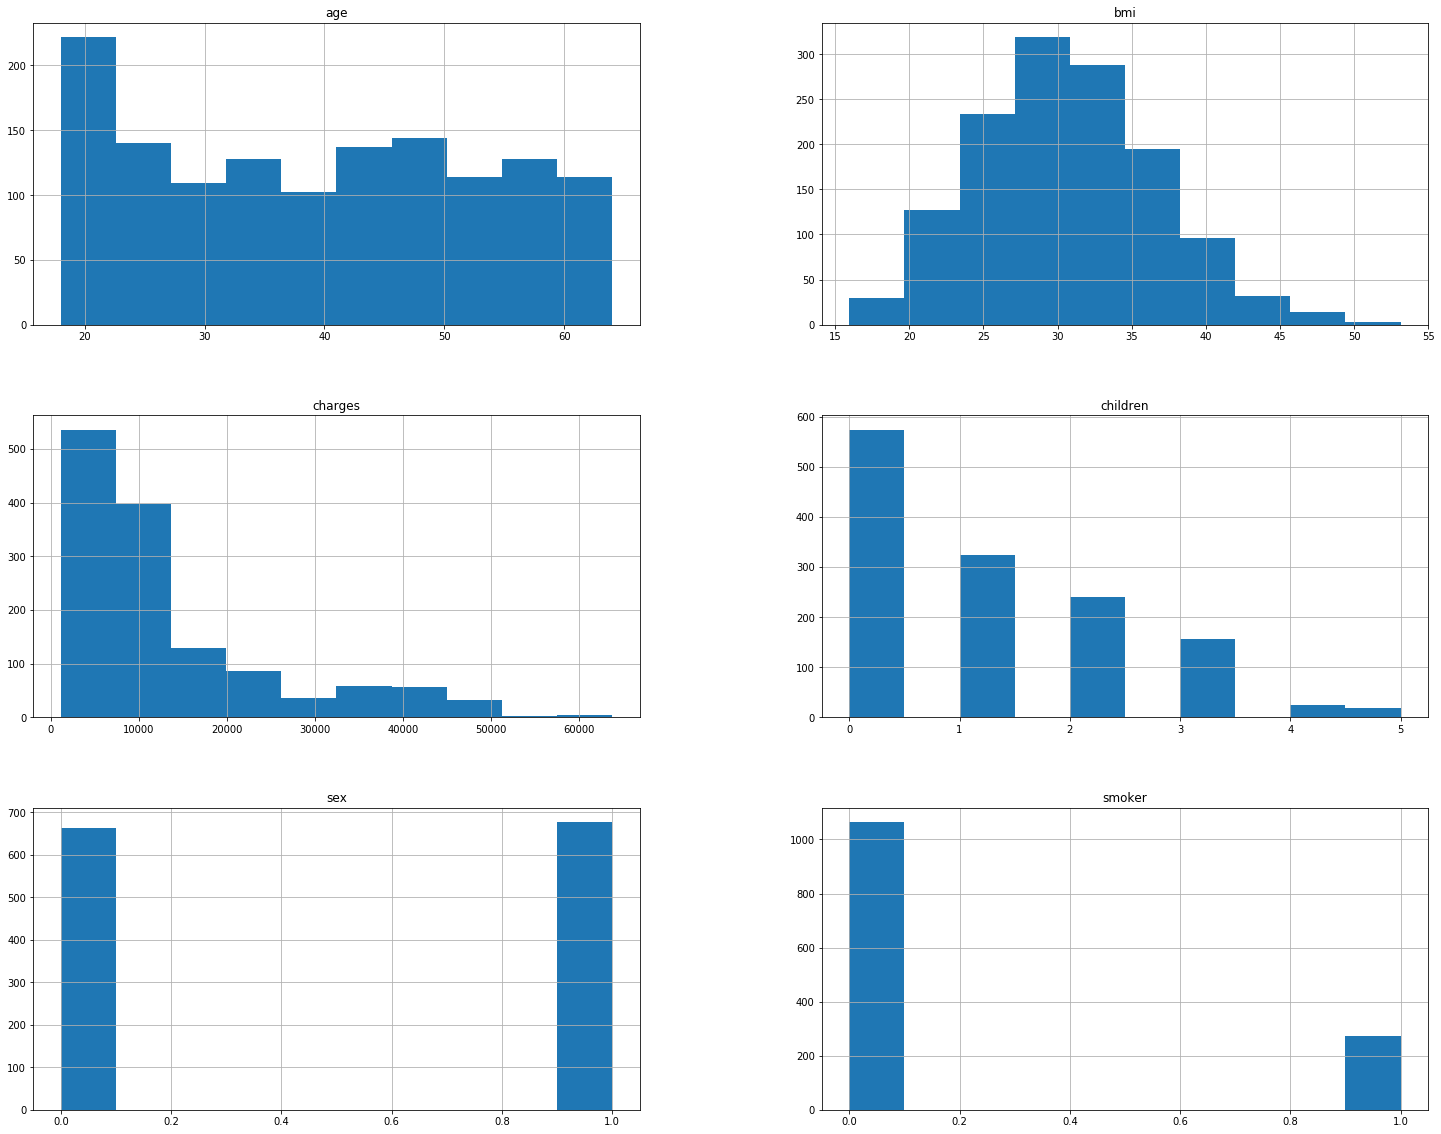

In [19]:
datah.hist(figsize=(25, 20));

### Комментарий к решению
И здесь всё верно






Сколько в среднем придется заплатить за страховку, в зависимости от региона

In [20]:
reg_ch = data.drop(['sex','smoker','bmi','children','age'],axis=1)
reg_ch.head()

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520


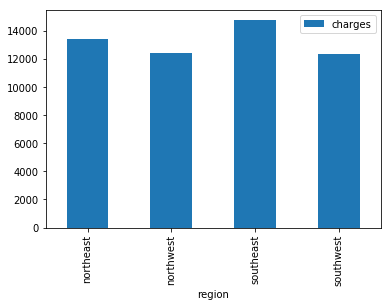

In [21]:
reg_av = reg_ch.groupby('region').mean()
reg_av['charges'] = round(reg_av['charges'])
reg_av.plot.bar()

In [22]:
reg_av

,charges
region,
northeast,13406.0
northwest,12418.0
southeast,14735.0
southwest,12347.0


In [23]:
rez = reg_av[reg_av['charges'] == max(reg_av['charges'])]
rez

,charges
region,
southeast,14735.0


Регион с самой дорогой страховкой (не надо там жить) : southeast

### Комментарий к решению
Действительно внезапно, а вопросы крутые




У кого больше детей: у курящих/не курящих ?

In [24]:
child = data.drop(['sex','charges','region','age','bmi'],axis=1)
child.head()

,children,smoker
0,0,1
1,1,0
2,3,0
3,0,0
4,0,0


In [25]:
 child.groupby('smoker').mean()

,children
smoker,
0,1.090226
1,1.113139


Вопреки ожиданиям, у курящих людей больше детей 





Зависимость индекса массы тела от возраста у курящих и не курящих. (Возможно, курильщики потолще)

In [26]:
bmi = data.drop(['sex','charges','region','children'],axis=1) #очщаем
bmi.head()

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [27]:
bmi_sm = bmi[bmi['smoker'] == 1].groupby('age').mean()#группируем курильщиков по возрасту
bmi_sm['bmi_sm'] = bmi_sm['bmi']
bmi_sm.head()

,bmi,smoker,bmi_sm
age,,,
18,29.544583,1,29.544583
19,31.217500,1,31.217500
20,28.501667,1,28.501667
21,23.775000,1,23.775000
22,37.381667,1,37.381667


In [28]:
bmi_notsm = bmi[bmi['smoker'] == 0].groupby('age').mean()#группируем не курильщиков
bmi_notsm['bmi_notsm'] = bmi_notsm['bmi']
bmi_notsm.head()


,bmi,smoker,bmi_notsm
age,,,
18,31.701228,0,31.701228
19,27.653500,0,27.653500
20,31.591750,0,31.591750
21,28.525000,0,28.525000
22,29.371136,0,29.371136


Text(0.5,1,'Распределение индекса массы тела у курящих и не курящих людей ')

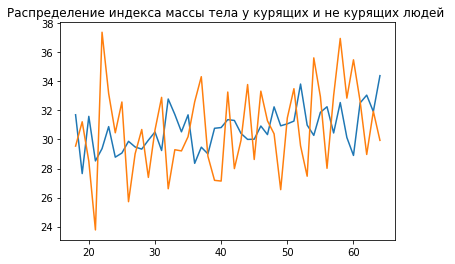

In [37]:
plt.plot(bmi_notsm.index, bmi_notsm['bmi_notsm'],bmi_sm.index, bmi_sm['bmi_sm'])

plt.title("Распределение индекса массы тела у курящих и не курящих людей ")


Вывод: в среднем индекс массы тела курящих не сильно превышает не курящих, но колебания у курильциков намного сильнее, что говорит о разных заболевания (как ожирение, так и недостаток веса). Гипотеза подтверждаена лишь частично. 

### Комментарий к решению
Отличный вопрос и визуализация с выводами!